In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from skimage import io # 

/home/jay/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [3]:
class TrainSet(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        
    def __len__(self):
        return 650
    
    def __getitem__(self, index):
        index += 1
        if index <= 400-36:
            img_name = 'images/DX/Noisy/' + str(index) + '.pgm'
            label_name = 'images/DX/Original/' + str(index) + '.pgm'
        else:
            img_name = 'images/MMM/Noisy/mdb' + str(index+36) + '.pgm'
            label_name = 'images/MMM/Original/mdb' + str(index+36) + '.pgm'
        image = io.imread(img_name)
        label = io.imread(label_name)

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)
            
        return image, label

In [4]:
class TestSet(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        
    def __len__(self):
        return 72
    
    def __getitem__(self, index):
        index += 1
        if index <= 36:
            img_name = 'images/DX/Noisy/' + str(index+400-36) + '.pgm'
            label_name = 'images/DX/Original/' + str(index+400-36) + '.pgm'
        else:
            img_name = 'images/MMM/Noisy/mdb' + str(index+650) + '.pgm'
            label_name = 'images/MMM/Original/mdb' + str(index+650) + '.pgm'
        image = io.imread(img_name)
        label = io.imread(label_name)

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)
            
        return image, label

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = TrainSet(transform)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = TestSet(transform)
testloader = DataLoader(testset, batch_size=4, num_workers=2)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

model = nn.Sequential(
    nn.Conv2d(1, 64, 5, padding=2),
    nn.MaxPool2d(2),
    nn.Conv2d(64, 64, 5, padding=2),
    nn.MaxPool2d(2),
    nn.Conv2d(64, 64, 5, padding=2),
    nn.Upsample(scale_factor=2),
    nn.Conv2d(64, 64, 5, padding=2),
    nn.Upsample(scale_factor=2),
    nn.Conv2d(64, 1, 5, padding=2),
    ).to(device)

print(model)

Sequential(
  (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (5): Upsample(scale_factor=2.0, mode=nearest)
  (6): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (7): Upsample(scale_factor=2.0, mode=nearest)
  (8): Conv2d(64, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)


In [7]:
# Parameters
nIters = 100
nPredict = 72
batchSize = 10
lr = 0.001 # learning_rate


# Loss Function
loss = nn.CrossEntropyLoss().to(device)



0 (64, 64) (64, 64)
1 (64, 64) (64, 64)
2 (64, 64) (64, 64)
3 (64, 64) (64, 64)


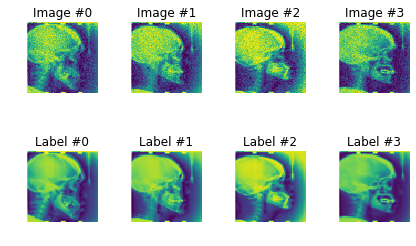

In [8]:
trainset = TrainSet()

plt.figure()

for i in range(len(trainset)):
    image, label = trainset[i]
    
    print(i, image.shape, label.shape)
    
    ax = plt.subplot(2, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Image #{}'.format(i))
    ax.axis('off')
    plt.imshow(image)
    ax = plt.subplot(2, 4, i + 5)
    plt.tight_layout()
    ax.set_title('Label #{}'.format(i))
    ax.axis('off')
    plt.imshow(label)
    
    if i == 3:
        plt.show()
        break

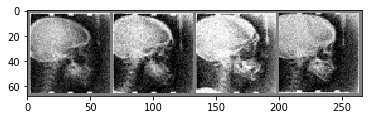

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
image, label = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(image))

In [10]:
sample = dataiter.next()
input = sample['image'].to(device)
output = model(input)
print(output)

TypeError: list indices must be integers or slices, not str

In [ ]:
model.zero_grad()
out.backward()